In [293]:
import requests
url = "http://openAPI.seoul.go.kr:8088/(요청코드)/json/ListSnowRemoveBox/1/1000/"
url2= "http://openAPI.seoul.go.kr:8088/(요청코드)/json/ListSnowRemoveBox/1001/2000/"
url3 = "http://openAPI.seoul.go.kr:8088/(요청코드)/json/ListSnowRemoveBox/2001/3000/"
url4 = "http://openAPI.seoul.go.kr:8088/(요청코드)/json/ListSnowRemoveBox/3001/3590/"
#1000까지는 긁어지는데 1500은안됨 for문으로 만들어줘서 크롤링한다. 
response = requests.get(url)
urlLst =[url, url2,url3, url4]

    

In [192]:
response.status_code # 성공 404 나 다르게 나오면 error

200

![](https://user-images.githubusercontent.com/36406676/43249879-dfb33e9e-90f6-11e8-9c69-fbeb64169fe1.PNG)

#### 홈페이지에 설명이 친절하게 나와있다

In [193]:
response.json()

{'ListSnowRemoveBox': {'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'list_total_count': 3590,
  'row': [{'DETL_CN': '종로구 율곡로30길 11',
    'G2_ID': 1.0,
    'G2_XMAX': 200650.9,
    'G2_XMIN': 200650.9,
    'G2_YMAX': 452539.6,
    'G2_YMIN': 452539.6,
    'MGC_NM': '종로구',
    'RM': '',
    'SBOX_NUM': '종로56가동-001'},
   {'DETL_CN': '종로구 낙산성곽서길 51',
    'G2_ID': 2.0,
    'G2_XMAX': 200756.7,
    'G2_XMIN': 200756.7,
    'G2_YMAX': 452790.2,
    'G2_YMIN': 452790.2,
    'MGC_NM': '종로구',
    'RM': '',
    'SBOX_NUM': '종로56가동-002'},
   {'DETL_CN': '종로구 충신길 34',
    'G2_ID': 3.0,
    'G2_XMAX': 200708.3,
    'G2_XMIN': 200708.3,
    'G2_YMAX': 452763.2,
    'G2_YMIN': 452763.2,
    'MGC_NM': '종로구',
    'RM': '',
    'SBOX_NUM': '종로56가동-003'},
   {'DETL_CN': '종로구 충신동 1-280',
    'G2_ID': 4.0,
    'G2_XMAX': 200648.5,
    'G2_XMIN': 200648.5,
    'G2_YMAX': 452860.4,
    'G2_YMIN': 452860.4,
    'MGC_NM': '종로구',
    'RM': '',
    'SBOX_NUM': '종로56가동-004'},
   {'DETL_CN': '종로구 충신길 

In [194]:
dt = response.json() #제이슨은 리스트와 딕셔너리가 합쳐진 형태
                     #key 와 value는?

In [195]:
info = dt['ListSnowRemoveBox']['row']
##데이터 프레임으로 만들자 원하는 정보가 row안에 담겨져 있으므로 dt['ListSnowRemoveBox']['row']= info로 할당한다

In [196]:
info[1:5]

[{'DETL_CN': '종로구 낙산성곽서길 51',
  'G2_ID': 2.0,
  'G2_XMAX': 200756.7,
  'G2_XMIN': 200756.7,
  'G2_YMAX': 452790.2,
  'G2_YMIN': 452790.2,
  'MGC_NM': '종로구',
  'RM': '',
  'SBOX_NUM': '종로56가동-002'},
 {'DETL_CN': '종로구 충신길 34',
  'G2_ID': 3.0,
  'G2_XMAX': 200708.3,
  'G2_XMIN': 200708.3,
  'G2_YMAX': 452763.2,
  'G2_YMIN': 452763.2,
  'MGC_NM': '종로구',
  'RM': '',
  'SBOX_NUM': '종로56가동-003'},
 {'DETL_CN': '종로구 충신동 1-280',
  'G2_ID': 4.0,
  'G2_XMAX': 200648.5,
  'G2_XMIN': 200648.5,
  'G2_YMAX': 452860.4,
  'G2_YMIN': 452860.4,
  'MGC_NM': '종로구',
  'RM': '',
  'SBOX_NUM': '종로56가동-004'},
 {'DETL_CN': '종로구 충신길 78',
  'G2_ID': 5.0,
  'G2_XMAX': 200626.6,
  'G2_XMIN': 200626.6,
  'G2_YMAX': 452957.6,
  'G2_YMIN': 452957.6,
  'MGC_NM': '종로구',
  'RM': '',
  'SBOX_NUM': '종로56가동-005'}]

In [197]:
DETL_CN = [x['DETL_CN'] for x in info]
G2_ID = [x['G2_ID'] for x in info]
G2_XMAX = [x['G2_XMAX'] for x in info]
G2_YMIN = [x['G2_YMIN'] for x in info]
MGC_NM = [x['MGC_NM'] for x in info]
#리스트로 담아준다. 판다스로 데이터프레임으로 만들어준다


import pandas as pd
yunsik = pd.DataFrame({"DETL_CN" : DETL_CN, "G2_ID" : G2_ID,"G2_XMAX" : G2_XMAX,"G2_YMIN":G2_YMIN, "MGC_NM":MGC_NM } ) #판다스로 데이터프레임으로 만들어준다.

In [199]:
print(yunsik[1:10])
print(len(yunsik)) #for 문 돌리기전  1000개만 크로링한 상태

               DETL_CN  G2_ID   G2_XMAX   G2_YMIN MGC_NM
1        종로구 낙산성곽서길 51    2.0  200756.7  452790.2    종로구
2           종로구 충신길 34    3.0  200708.3  452763.2    종로구
3        종로구 충신동 1-280    4.0  200648.5  452860.4    종로구
4           종로구 충신길 78    5.0  200626.6  452957.6    종로구
5          종로구 충신4길 21    6.0  200706.5  452915.4    종로구
6      종로구 낙산성곽서길 89-6    7.0  200717.3  452986.0    종로구
7  종로구 충신4길31-10 31-10    8.0  200722.8  452904.4    종로구
8        종로구 낙산성곽서길 63    9.0  200756.2  452849.4    종로구
9        종로구 낙산성곽서길 25   10.0  200752.9  452662.4    종로구
1000


In [200]:
DETL_CN[1:10] #리스트로 담긴거 확인

['종로구 낙산성곽서길 51',
 '종로구 충신길 34',
 '종로구 충신동 1-280',
 '종로구 충신길 78',
 '종로구 충신4길 21',
 '종로구 낙산성곽서길 89-6',
 '종로구 충신4길31-10 31-10',
 '종로구 낙산성곽서길 63',
 '종로구 낙산성곽서길 25']

In [208]:
#for 문을 이용하여 전체 데이터를 가져온다  ##extend활용 
urlLst =[url,url2,url3, url4]
DETL_CN=[]
G2_ID=[]
G2_XMAX=[]
G2_YMIN=[]
MGC_NM = []
for i in urlLst:
    
    response = requests.get(i)
    dt = response.json()
    info = dt['ListSnowRemoveBox']['row']
    DETL_CN.extend([x['DETL_CN'] for x in info])
    G2_ID.extend([x['G2_ID'] for x in info])
    G2_XMAX.extend([x['G2_XMAX'] for x in info])
    G2_YMIN.extend([x['G2_YMIN'] for x in info])
    MGC_NM.extend([x['MGC_NM'] for x in info])
## 예외처리문이랑  위경도 변환?
## 한자와 독어 인코딩 미리 알아두자. 
    

In [209]:
yunsik = pd.DataFrame({"DETL_CN" : DETL_CN, "G2_ID" : G2_ID,"G2_XMAX" : G2_XMAX,"G2_YMIN":G2_YMIN,"MGC_NM":MGC_NM } )

In [210]:
len(yunsik) ## 모든 데이터 담겼다

3590

In [211]:
yunsik.head()

,DETL_CN,G2_ID,G2_XMAX,G2_YMIN,MGC_NM
0,종로구 율곡로30길 11,1.0,200650.9,452539.6,종로구
1,종로구 낙산성곽서길 51,2.0,200756.7,452790.2,종로구
2,종로구 충신길 34,3.0,200708.3,452763.2,종로구
3,종로구 충신동 1-280,4.0,200648.5,452860.4,종로구
4,종로구 충신길 78,5.0,200626.6,452957.6,종로구


In [184]:
yunsik.describe() ##DETL_CN,MGC_NM은 문자형이라 describe()안먹힘 사실 위도경도는 describe하는 의미가 엄슴

,G2_ID,G2_XMAX,G2_YMIN
count,3590.000000,3590.000000,3590.000000
mean,1795.500000,199386.023120,450714.435599
std,1036.488061,6572.976587,5757.671549
min,1.000000,182205.000000,437273.400000
25%,898.250000,194590.975000,446147.050000
50%,1795.500000,200591.500000,450796.100000
75%,2692.750000,204024.425000,454240.150000
max,3590.000000,216075.800000,465652.900000


In [214]:
yunsik['MGC_NM'].value_counts() ## 종로구가 제일 많다. 은평구는 역시나 하위권이다.                                 

종로구        380
강남구        249
성동구        204
용산구        188
노원구        188
성북구        171
강북구        168
동대문구       158
영등포구       158
금천구        150
중구         141
구로구        128
서초구        120
강서구        115
서대문구       105
도봉구        102
동작구        100
마포구         92
중랑구         88
서울시설공단      82
양천구         82
은평구         81
강동구         75
광진구         69
송파구         58
관악구         51
성동도로        38
서부도로사업소     21
강서도로사업소     15
동부도로         9
남부도로사업소      2
북부도로사업소      2
Name: MGC_NM, dtype: int64

In [231]:
print(len(yunsik['DETL_CN']))
print(len(yunsik['DETL_CN'].unique())) ##겹치는게 400여개 있음

3590
3105


In [295]:
##경도와 위도를 찾아주는 코드는 사정상 생략
##경도와 위도 정보가 담긴 dt_geo 데이터프레임 만듬
dt_geo.head()


,경도,위도,DETL_CN
0,127.0073498,37.5724168,종로구 율곡로30길 11
1,127.0085364,37.5746878,종로구 낙산성곽서길 51
2,127.0080134,37.5744255,종로구 충신길 34
3,127.0073334,37.5753006,종로구 충신동 1-280
4,127.0070828,37.5761834,종로구 충신길 78


In [258]:
dt_geo.columns = ['경도','위도','DETL_CN']
dt_geo.head() ##병합을 위해 column명 통일
len(dt_geo)
yunsik.head()

,DETL_CN,G2_ID,G2_XMAX,G2_YMIN,MGC_NM
0,종로구 율곡로30길 11,1.0,200650.9,452539.6,종로구
1,종로구 낙산성곽서길 51,2.0,200756.7,452790.2,종로구
2,종로구 충신길 34,3.0,200708.3,452763.2,종로구
3,종로구 충신동 1-280,4.0,200648.5,452860.4,종로구
4,종로구 충신길 78,5.0,200626.6,452957.6,종로구


In [254]:
## yunsik 과 dt_geo자료를 합친다. 판다스 이용
yunsik_final = pd.merge(yunsik,dt_geo,on="DETL_CN")

In [260]:
yunsik_final[2000:2100] ##왜인진 모르겠는데 겹치는 행이 생긴다 이를 없에준다.


,DETL_CN,G2_ID,G2_XMAX,G2_YMIN,MGC_NM,경도,위도
2000,노원구 화랑로,1490.0,206183.1,457343.9,노원구,127.0906071,37.6236679
2001,노원구 화랑로,1490.0,206183.1,457343.9,노원구,127.0906071,37.6236679
2002,노원구 화랑로,1503.0,206661.2,457575.5,노원구,127.0906071,37.6236679
2003,노원구 화랑로,1503.0,206661.2,457575.5,노원구,127.0906071,37.6236679
2004,노원구 화랑로,1503.0,206661.2,457575.5,노원구,127.0906071,37.6236679
2005,노원구 화랑로,1503.0,206661.2,457575.5,노원구,127.0906071,37.6236679
2006,노원구 화랑로,1503.0,206661.2,457575.5,노원구,127.0906071,37.6236679
2007,노원구 화랑로,1503.0,206661.2,457575.5,노원구,127.0906071,37.6236679
2008,노원구 화랑로,1503.0,206661.2,457575.5,노원구,127.0906071,37.6236679
2009,노원구 화랑로,1503.0,206661.2,457575.5,노원구,127.0906071,37.6236679


In [266]:
yunsik2 = yunsik_final.drop_duplicates()
yunsik2.info() ##겹치는 행 삭제하고 원래대로 돌아옴

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3590 entries, 0 to 7565
Data columns (total 7 columns):
DETL_CN    3590 non-null object
G2_ID      3590 non-null float64
G2_XMAX    3590 non-null float64
G2_YMIN    3590 non-null float64
MGC_NM     3590 non-null object
경도         3590 non-null object
위도         3590 non-null object
dtypes: float64(3), object(4)
memory usage: 224.4+ KB


In [294]:
yunsik2[125:127] ##fail 이 보인다. 일단은 간단한 시각화를 위해 이 자료들을 없엔다


,DETL_CN,G2_ID,G2_XMAX,G2_YMIN,MGC_NM,경도,위도
125,종로구 지봉로13가길 23-815,126.0,201226.6,453096.7,종로구,fail,fail
126,종로구 지봉로13가길 23-317,127.0,201226.6,453098.0,종로구,fail,fail


In [268]:
yunsik3 = yunsik2[yunsik2['경도'] != 'fail'] ##위도 경도를 찾지 못한 fail행을 삭제한다.

In [269]:
len(yunsik3) ##수가 확 줄어들었다.  ㅠㅠ

2779

In [289]:
yunsik3['위도'] = yunsik3['위도'].astype(float) ##float으로 변환해야 scatterplot가능
yunsik3['경도'] = yunsik3['경도'].astype(float)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [290]:
yunsik3.info() ##경도와 위도가 float으로 변환됨

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2779 entries, 0 to 7565
Data columns (total 7 columns):
DETL_CN    2779 non-null object
G2_ID      2779 non-null float64
G2_XMAX    2779 non-null float64
G2_YMIN    2779 non-null float64
MGC_NM     2779 non-null object
경도         2779 non-null float64
위도         2779 non-null float64
dtypes: float64(5), object(2)
memory usage: 253.7+ KB


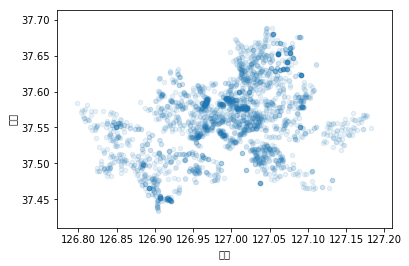

In [292]:
#간단한 시각화
%matplotlib inline
import matplotlib.pyplot as plt

yunsik3.plot(kind = 'scatter',x='경도',y='위도',alpha = 0.1)